# Multiple Linear Regression 

## importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
data = pd.read_csv(r"C:\Users\91771\Downloads\archive\Iris.csv")

### Feature and Target selection

In [3]:
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = data['Species'].values

### Label Encoding

In [4]:
# Custom label encoding function
def label_encode(target):
    classes = list(set(target))
    encoding = {cls: idx for idx, cls in enumerate(classes)}
    return np.array([encoding[cls] for cls in target])

y =  label_encode(y)

### Bias Selection

In [5]:
X_bias =  np.c_[np.ones(X.shape[0]),X] 

## Training and Testing the data

In [6]:
#Manually Splitting the dataset into training and testing set
#setting random seed for reproducibility
np.random.seed(0)
indices =  np.random.permutation(len(X_bias))
split_ratio = 0.8 #means 80% traing, 20% testing
split_index = int(len(X_bias)*split_ratio)
X_train, X_test =  X_bias[:split_index], X_bias[split_index:]
y_train,  y_test  = y[:split_index], y[split_index:]

## Multiple Linear Regression Model

In [7]:
class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate;
        self.n_iterations = n_iterations;
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.m = len(y)
        
        for i in range(self.n_iterations):
            gradients = 2/self.m * X.T.dot(X.dot(self.theta)-y)
            self.theta -= self.learning_rate * gradients
            
    def predict(self, X):
        return X.dot(self.theta)

### assigining and training the model

In [8]:
model = MultipleLinearRegression()
model.fit(X_train, y_train)

### Prediction on the test data

In [9]:
y_pred = model.predict(X_test)

## Evaluation of the Model

In [10]:
mse = np.mean((y_test - y_pred)**2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.2174707207141424


### Confusion Matrix

In [11]:
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_true)):
        true_label = int(y_true[i])
        predict_label = int(y_pred[i])
        matrix[true_label][predict_label] += 1
    return matrix

In [12]:
#setting num_classes value which 3 here for Iris dataset
num_classes = 3

In [13]:
##calling the confusion matrix by assigning to a variable
confusion_mat = confusion_matrix(y_test,y_pred,num_classes)

## Visualizing the model output

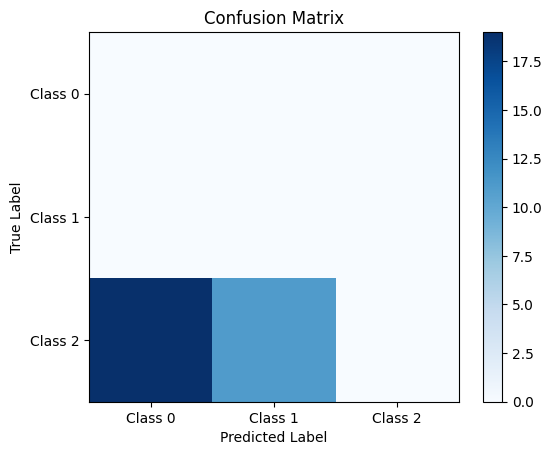

In [14]:
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])
plt.yticks(tick_marks, ['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()